# DATA ANALYSIS (1)

General overview of data and inspection of linear relationships between match statistics.
***

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import histogram_bin_edges
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import ttest_ind
import seaborn as sns

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)


In [173]:
# Display code copied to make displaying tables easier
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [174]:
df = pd.read_csv('output_cleaned_combined.csv')
df['is_win'] = df['is_win'].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hero_id_x     2284 non-null   int64  
 1   playtime.raw  2284 non-null   int64  
 2   kills_x       2284 non-null   int64  
 3   deaths_x      2284 non-null   int64  
 4   assists_x     2284 non-null   int64  
 5   hit_rate      2284 non-null   float64
 6   player_uid    2284 non-null   int64  
 7   match_uid     2284 non-null   object 
 8   attack_type   2284 non-null   object 
 9   role          2284 non-null   object 
 10  name          2284 non-null   object 
 11  hero_id_y     2284 non-null   int64  
 12  is_win        2284 non-null   int32  
 13  kills_y       2284 non-null   int64  
 14  deaths_y      2284 non-null   int64  
 15  assists_y     2284 non-null   int64  
 16  hero_damage   2284 non-null   float64
 17  hero_healed   2284 non-null   float64
 18  damage_taken  2284 non-null 

,hero_id_x,playtime.raw,kills_x,deaths_x,assists_x,hit_rate,player_uid,match_uid,attack_type,role,name,hero_id_y,is_win,kills_y,deaths_y,assists_y,hero_damage,hero_healed,damage_taken
0,1018,682,34,5,4,0.370249,2020018278,4891619_1740278739_468_11001_10,Projectile,VANGUARD,CPTKILLER310,1018,1,34,5,4,16854.329755,0.000000,26966.098306
1,1031,552,16,3,22,0.413103,135606949,4891619_1740278739_468_11001_10,Hitscan,STRATEGIST,xoiil,1031,1,17,6,23,7535.359508,25405.172459,7960.640990
2,1023,682,12,5,35,0.210819,244100036,4891619_1740278739_468_11001_10,Projectile,STRATEGIST,KingJ100,1023,1,12,5,35,3349.914821,25408.342077,5511.499575
3,1045,597,24,5,10,0.452899,227355910,4891619_1740278739_468_11001_10,Projectile,DUELIST,ZEGkS117,1045,1,25,6,10,21889.427433,0.000000,10382.466436
4,1043,682,31,4,0,0.366652,2110033791,4891619_1740278739_468_11001_10,Hitscan,DUELIST,DiegoU1507,1043,1,31,4,0,18191.594595,0.000000,9494.796316


In [175]:
df['is_win'] = df['is_win'].astype(int)

Let's do some simple plots of stats against each other, grouping by the match id


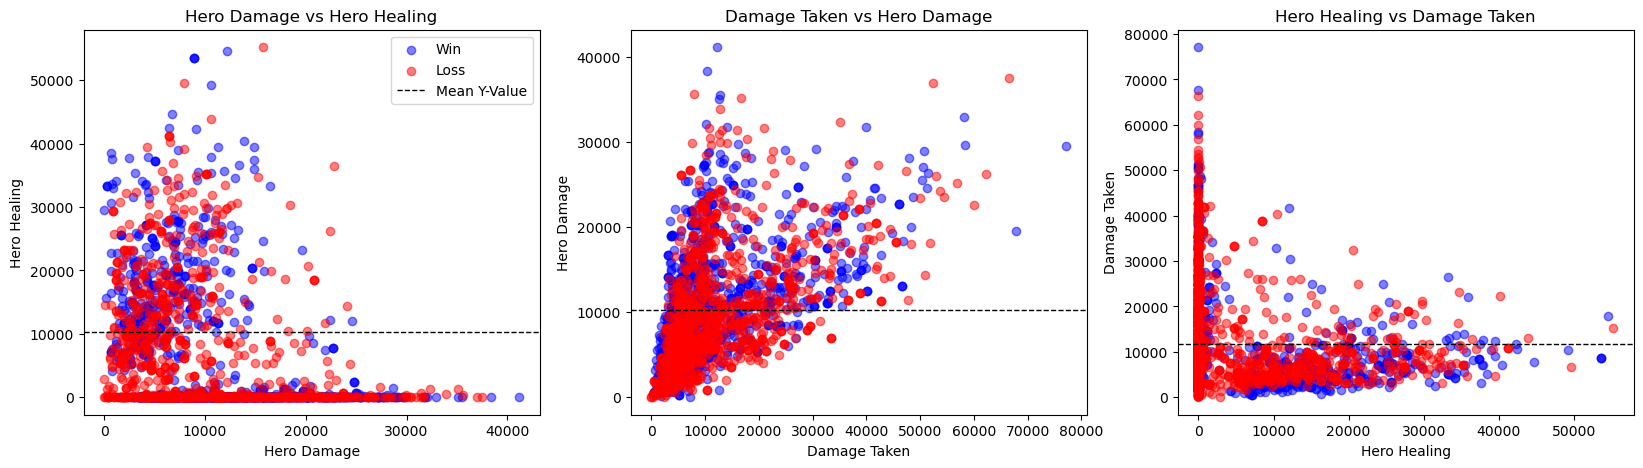

In [176]:
# grab data for win and loss
df_win = df[df['is_win'] == 1]
df_lose = df[df['is_win'] == 0]

mean_dmg = df['hero_damage'].mean()
mean_heal = df['hero_healed'].mean()
mean_dmg_taken = df['damage_taken'].mean()

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# damage vs healing
axs[0].scatter(data=df_win, x='hero_damage', y='hero_healed', alpha=0.5, c='blue')
axs[0].scatter(data=df_lose, x='hero_damage', y='hero_healed', alpha=0.5, c='red')
axs[0].axhline(mean_dmg, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Hero Damage')
axs[0].set_ylabel('Hero Healing')
axs[0].set_title('Hero Damage vs Hero Healing')
axs[0].legend(['Win', 'Loss', 'Mean Y-Value'])

# okay lets take a look at damage taken
axs[1].scatter(data=df_win, x='damage_taken', y='hero_damage', alpha=0.5, c='blue')
axs[1].scatter(data=df_lose, x='damage_taken', y='hero_damage', alpha=0.5, c='red')
axs[1].axhline(mean_dmg, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Damage Taken')
axs[1].set_ylabel('Hero Damage')
axs[1].set_title('Damage Taken vs Hero Damage')


# finally lets take a look at healing done vs damage taken
axs[2].scatter(data=df_win, x='hero_healed', y='damage_taken', alpha=0.5, c='blue')
axs[2].scatter(data=df_lose, x='hero_healed', y='damage_taken', alpha=0.5, c='red')
axs[2].axhline(mean_dmg_taken, color='black', linestyle='dashed', linewidth=1)
axs[2].set_xlabel('Hero Healing')
axs[2].set_ylabel('Damage Taken')
axs[2].set_title('Hero Healing vs Damage Taken')


plt.show()

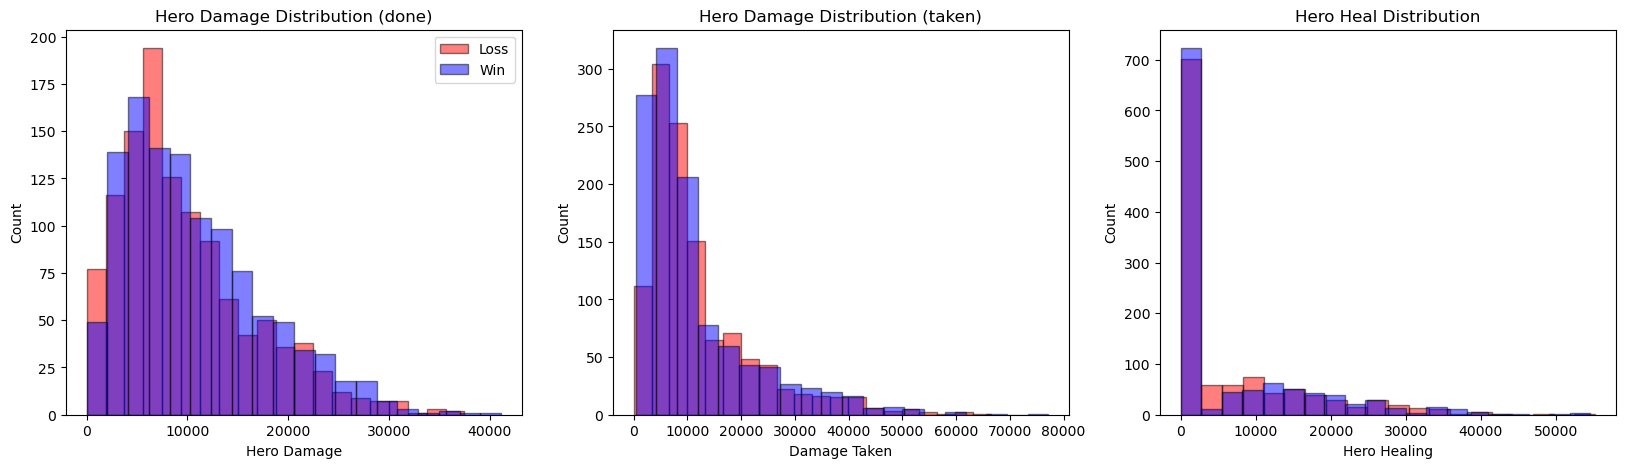

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(df_lose['hero_damage'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[0].hist(df_win['hero_damage'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black') 
axs[0].set_xlabel('Hero Damage')
axs[0].set_ylabel('Count')
axs[0].set_title('Hero Damage Distribution (done)')
axs[0].legend()

axs[1].hist(df_lose['damage_taken'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[1].hist(df_win['damage_taken'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black') 
axs[1].set_xlabel('Damage Taken')
axs[1].set_ylabel('Count')
axs[1].set_title('Hero Damage Distribution (taken)')

axs[2].hist(df_lose['hero_healed'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[2].hist(df_win['hero_healed'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black') 
axs[2].set_xlabel('Hero Healing')
axs[2].set_ylabel('Count')
axs[2].set_title('Hero Heal Distribution')

plt.show()



Consider looking at something similar above but we filter data for support heros or heros that have healing above a certain threshold

***
The scatter plots seem quite noisy with little linear model application, which is normal for a multivariable model like a game. While I will perform a simple regressional analysis, I don't hold hope for this.

Some things we can note from this data pool:

1. **Hero Heal Distribution**
- The large count around 0 asserts overall less supports or supports flexing during the match
- The win count being larger suggests that DPS/Tank Potentially provide a bigger impact on the match
- Similar to the above statment, there are many wins focused around 12000 healing, suggesting sub-support (off-healer) can determine a match win
2. **Hero Damage Distribution (done)**
- We see the highest win to loss ratio in two places, around 15000 dmg and 4000-5000 dmg
- This can suggest that supports are necessary as well see overall lower dmg output from them
    - Likely needs to be broken down into categories by role
- This can suggest a certain dmg threshold needs to be met per match to up the chances of a win (see dmg taken for more insight)

***

Lets take a quick look at KDA as well.

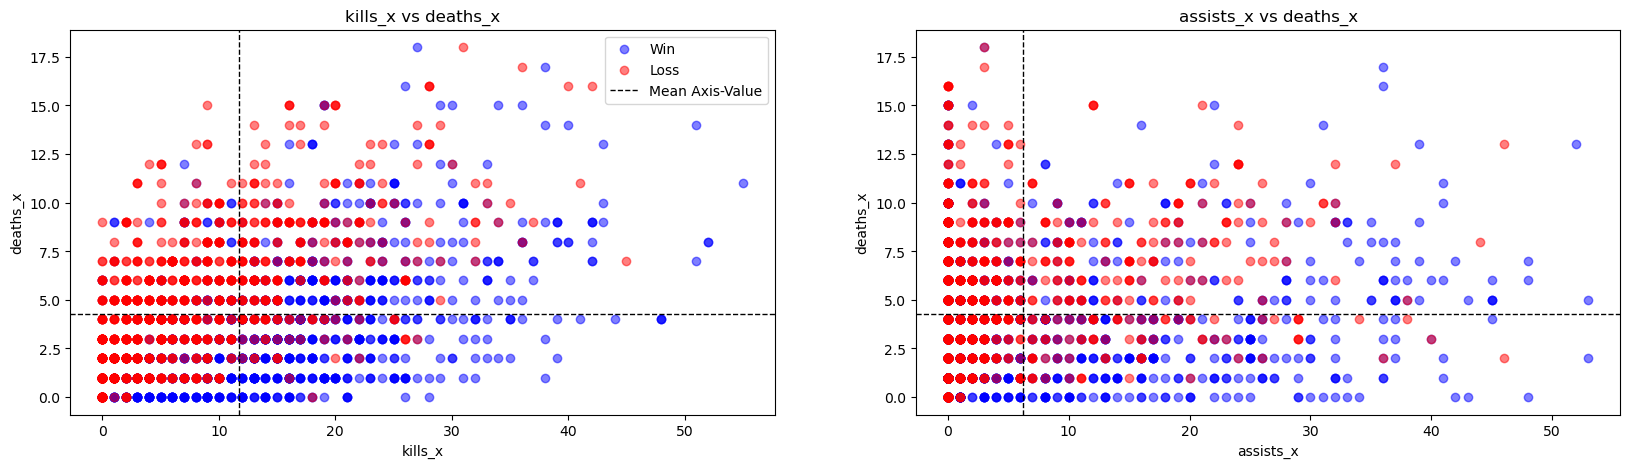

In [178]:
# check kills_x vs deaths_x against win/loss
mean_kills = df['kills_x'].mean()
mean_deaths = df['deaths_x'].mean()
mean_assists = df['assists_x'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_win, x='kills_x', y='deaths_x', alpha=0.5, c='blue')
axs[0].scatter(data=df_lose, x='kills_x', y='deaths_x', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('kills_x')
axs[0].set_ylabel('deaths_x')
axs[0].set_title('kills_x vs deaths_x')
axs[0].legend(['Win', 'Loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_win, x='assists_x', y='deaths_x', alpha=0.5, c='blue')
axs[1].scatter(data=df_lose, x='assists_x', y='deaths_x', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('assists_x')
axs[1].set_ylabel('deaths_x')
axs[1].set_title('assists_x vs deaths_x')


plt.show()


#### Assumption:
Interestingly enough, we can see from the above KD AD plots that kills_x and kill participation improve winning overall compared to deaths_x. It's fine to have a large amount of deaths_x so long as you're getting kills_x. 
***
Now lets plot the KDA function as a single value against win and loss

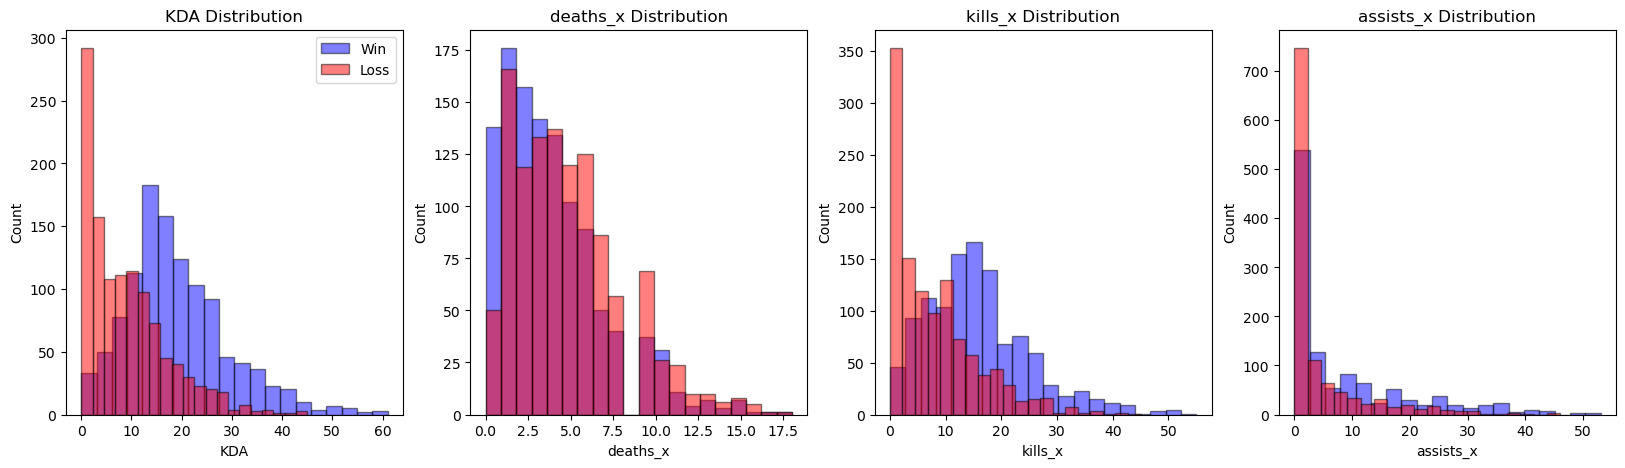

In [179]:
#  Create a new column for adjusted deaths_x since we can't divide by 0
df_win['deaths_adj'] = df_win['deaths_x'].apply(lambda x: 1 if x == 0 else x)
df_lose['deaths_adj'] = df_lose['deaths_x'].apply(lambda x: 1 if x == 0 else x)

KDA_win = df_win['kills_x'] + df_win['assists_x'] / df_win['deaths_adj']
KDA_loss = df_lose['kills_x'] + df_lose['assists_x'] / df_lose['deaths_adj']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].hist(KDA_win, bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[0].hist(KDA_loss, bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[0].set_xlabel('KDA')
axs[0].set_ylabel('Count')
axs[0].set_title('KDA Distribution')
axs[0].legend()

axs[1].hist(df_win['deaths_x'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[1].hist(df_lose['deaths_x'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[1].set_xlabel('deaths_x')
axs[1].set_ylabel('Count')
axs[1].set_title('deaths_x Distribution')

axs[2].hist(df_win['kills_x'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[2].hist(df_lose['kills_x'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[2].set_xlabel('kills_x')
axs[2].set_ylabel('Count')
axs[2].set_title('kills_x Distribution')

axs[3].hist(df_win['assists_x'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[3].hist(df_lose['assists_x'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[3].set_xlabel('assists_x')
axs[3].set_ylabel('Count')
axs[3].set_title('assists_x Distribution')

plt.show()

As expected we can see that:
1. Higher KDA = more likely to win
    - less deaths_x > win %
    - more kills_x > win %

But what is really interesting is the bin sizes. Even when given the same number of bin, there seems to be more independent bins for the 'Lose' parameter.

This suggests that most people who are winning all have similar KDA's (per match) which suggests each person on the team touching the enemy at least once before they die. 

***

Lets see now what the correlation is like for each of these variables independently

In [180]:
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [181]:
# Train set
heal_train, heal_test, Yh_train, Yh_test = train_test_split(df['hero_healed'], df['is_win'], test_size=0.20, random_state=42)

# fit model 
regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(heal_train.values.reshape(-1, 1), Yh_train)
Yh_pred = regression_model.predict(heal_test.values.reshape(-1, 1))

print(f'Regression Coeffs: {regression_model.coef_}\n')

print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Yh_test, Yh_pred)}\n')

print(f'R^2 Coeffecient: {r2_score(Yh_test, Yh_pred)}')

Regression Coeffs: [4.9930323e-07]

Mean Squared Error between Y_test & Y_pred: 0.2499736096487465

R^2 Coeffecient: -1.4143997453253121e-05


We can see independently, healing has little outcome with match win or loss. So lets add all the other variables we've looked at so far! 

In [182]:
test_params = ['kills_x',	'deaths_x', 'assists_x', 'hero_damage',	'hero_healed', 'damage_taken']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train) 
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf1 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf1 = pd.concat([cdf1, new_row], ignore_index=True)


Regression Coeffs: [ 3.24141863e-02 -5.91347208e-02  1.38104092e-02 -1.01009212e-05
 -8.05550433e-06  8.74013368e-08]

Mean Squared Error between Y_test & Y_pred: 0.1561160496785143

R^2 Coeffecient: 0.3754610416559776


This model is a lot better, with R2 of 0.37, so what if we remove all the parameters that have negative regression coeffs?

In [183]:
test_params = ['kills_x',	'assists_x', 'damage_taken']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf2 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf2 = pd.concat([cdf2, new_row], ignore_index=True)

Regression Coeffs: [ 2.25126055e-02  6.82413078e-03 -4.15369271e-06]

Mean Squared Error between Y_test & Y_pred: 0.19717345577931433

R^2 Coeffecient: 0.2112117560040222


It becomes significantly worse. How about we look back at the previous plots and determine what params are best?
- kills_x
- deaths_x
- assists_x
- Damage taken

In [184]:
test_params = ['kills_x',	'deaths_x', 'assists_x', 'damage_taken']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf3 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf3 = pd.concat([cdf3, new_row], ignore_index=True)

Regression Coeffs: [ 3.08913552e-02 -6.12465203e-02  8.88979456e-03 -2.23542637e-06]

Mean Squared Error between Y_test & Y_pred: 0.15832101417198038

R^2 Coeffecient: 0.36664012778600297


This is the best R^2 value yet. Let's check to see if KDA independently gives a higher score.

In [185]:
test_params = ['kills_x',	'deaths_x', 'assists_x']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf4 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf4 = pd.concat([cdf4, new_row], ignore_index=True)

Regression Coeffs: [ 0.03040459 -0.06201586  0.0094137 ]

Mean Squared Error between Y_test & Y_pred: 0.15932684211329948

R^2 Coeffecient: 0.36261633435772744


In [186]:
test_params = ['kills_x',	'deaths_x']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf5 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf5 = pd.concat([cdf5, new_row], ignore_index=True)

Regression Coeffs: [ 0.03132756 -0.05934482]

Mean Squared Error between Y_test & Y_pred: 0.1708454306395265

R^2 Coeffecient: 0.3165364643214482


In [187]:
test_params = ['kills_x']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf6 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf6 = pd.concat([cdf6, new_row], ignore_index=True)

Regression Coeffs: [0.02248926]

Mean Squared Error between Y_test & Y_pred: 0.20977971245820348

R^2 Coeffecient: 0.16078069250309668


In [188]:
test_params = ['deaths_x']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf7 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf7 = pd.concat([cdf7, new_row], ignore_index=True)


Regression Coeffs: [-0.02135841]

Mean Squared Error between Y_test & Y_pred: 0.2418802977814965

R^2 Coeffecient: 0.03236297913328423


In [189]:
test_params = test_params = ['hero_damage',	'hero_healed', 'damage_taken']

test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf8 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf8 = pd.concat([cdf7, new_row], ignore_index=True)

Regression Coeffs: [ 8.67492042e-06  1.61190156e-06 -3.59749884e-06]

Mean Squared Error between Y_test & Y_pred: 0.24661240851543448

R^2 Coeffecient: 0.013432270121442547


In [190]:
final_df.set_index('Feature', inplace=True)

In [210]:
# Define the list of DataFrames to combine
dfs = [cdf1, cdf2, cdf3, cdf4, cdf5, cdf6, cdf7]

# Combine all regression tables into a single comparison DataFrame
comparison_df = pd.concat(dfs, axis=1)

# Rename columns to reflect their respective coefficient group
new_column_names = []
for i, df in enumerate(dfs):
	for col in df.columns:
		if col != 'Feature':  # Avoid renaming 'Feature' columns
			new_column_names.append(f'Coefficient_{i+1}')
		else:
			new_column_names.append(col)

comparison_df.columns = new_column_names

# Add the 'Feature' column from the first DataFrame (if not already present)
if 'Feature' not in comparison_df.columns:
	comparison_df.insert(0, 'Feature', dfs[0]['Feature'])

# Display the combined comparison DataFrame
comparison_df
# Group the regression models into groups and create a table with NaNs for missing values
grouped_dfs = []

for i, df in enumerate(dfs):
    group_df = df.copy()
    group_df.columns = ['Feature', f'Coefficient_Group_{i+1}']
    grouped_dfs.append(group_df)

# Merge all grouped DataFrames on 'Feature', filling missing values with NaN
grouped_table = grouped_dfs[0]
for group_df in grouped_dfs[1:]:
    grouped_table = pd.merge(grouped_table, group_df, on='Feature', how='outer')

# Display the grouped table
grouped_table

# Sort the table by the highest R2 value and set 'Feature' as the index
grouped_table_sorted = grouped_table.set_index('Feature')
sorted_columns = grouped_table_sorted.loc['R2'].sort_values(ascending=False).index
grouped_table_sorted = grouped_table_sorted[sorted_columns]

grouped_table_sorted

,Coefficient_Group_1,Coefficient_Group_3,Coefficient_Group_4,Coefficient_Group_5,Coefficient_Group_2,Coefficient_Group_6,Coefficient_Group_7
Feature,,,,,,,
MSE,1.561160e-01,0.158321,0.159327,0.170845,0.197173,0.209780,0.241880
R2,3.754610e-01,0.366640,0.362616,0.316536,0.211212,0.160781,0.032363
assists_x,1.381041e-02,0.008890,0.009414,NaN,0.006824,NaN,NaN
damage_taken,8.740134e-08,-0.000002,NaN,NaN,-0.000004,NaN,NaN
deaths_x,-5.913472e-02,-0.061247,-0.062016,-0.059345,NaN,NaN,-0.021358
hero_damage,-1.010092e-05,NaN,NaN,NaN,NaN,NaN,NaN
hero_healed,-8.055504e-06,NaN,NaN,NaN,NaN,NaN,NaN
kills_x,3.241419e-02,0.030891,0.030405,0.031328,0.022513,0.022489,NaN


In [192]:
# Ensure all columns are numeric
final_df_numeric = final_df.apply(pd.to_numeric, errors='coerce')

sorted_columns = final_df_numeric.iloc[1].sort_values(ascending=False).index

# Reorder the columns in the DataFrame
df_sorted = final_df.reindex(columns=sorted_columns)



### Regression Model Coeff Table

Above we can see a table that is sorted (descending left to right) for the highest R^2 value and lowest MSE.  Values where `NaN` appear are variables that were not used in the regression model. 

`assists_x`, `damage_taken`, `kills_x`, and  `deaths_x` have the highest correlation with `is_win` outcome when creating a regression model.

### Scientific Summary of Findings
#### Key Findings:
**Hero Damage, Healing, and Damage Taken**:
- Scatter plots and histograms reveal that higher hero damage correlates with match wins, while healing and damage taken show weaker relationships.
- Regression analysis indicates that `hero_damage` has a negligible coefficient, suggesting limited predictive power for match outcomes.

**Kills, Deaths, and Assists (KDA)**:
- Higher kills (`kills_x`) and assists (`assists_x`) positively correlate with match wins, while deaths (`deaths_x`) negatively correlate.
- KDA distribution shows that higher KDA values are strongly associated with match wins, emphasizing the importance of kill participation and survivability.

**Regression Models**:
- A multivariate regression model using all gameplay metrics achieved an R² of ~0.37, indicating moderate predictive power.
- Simplifying the model by removing features with negative coefficients reduced performance, highlighting the importance of including all relevant variables.

**Feature Importance**:
- `kills_x`, `assists_x`, and `damage_taken` consistently emerged as the most significant predictors of match outcomes.
- Healing (`hero_healed`) and damage metrics (`hero_damage`, `damage_taken`) showed weaker correlations, suggesting their impact is less direct.

 **Role-Specific Insights**:
 - **STRATEGIST** heroes (high healing) and **DUELISTS** (high damage output) exhibit distinct patterns, with healing contributions being less predictive of match outcomes compared to damage metrics.

#### Conclusion:

The analysis demonstrates that offensive metrics like kills and assists are the strongest predictors of match success, while defensive metrics like healing and damage taken (primarily **VANGUARD**) play a secondary role. The findings suggest that team **coordination** and **kill participation** are *critical* for achieving victory in competitive matches.